#  Lista 4, Caio Henrique Marques  N USP:10235481

In [1]:
# primeira questão
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
iris = load_iris() 
#alterando conforme o exercicio
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df =  df.iloc[:,[0,2]]

X_train, X_test, y_train, y_test = train_test_split(df, iris.target, test_size=0.33, random_state=42)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.98

In [2]:
y_pred = clf.predict(X_test)
classification_report(y_test,y_pred,output_dict=True)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19},
 '1': {'precision': 1.0,
  'recall': 0.9333333333333333,
  'f1-score': 0.9655172413793104,
  'support': 15},
 '2': {'precision': 0.9411764705882353,
  'recall': 1.0,
  'f1-score': 0.9696969696969697,
  'support': 16},
 'accuracy': 0.98,
 'macro avg': {'precision': 0.9803921568627452,
  'recall': 0.9777777777777779,
  'f1-score': 0.9784047370254267,
  'support': 50},
 'weighted avg': {'precision': 0.9811764705882353,
  'recall': 0.98,
  'f1-score': 0.9799582027168234,
  'support': 50}}

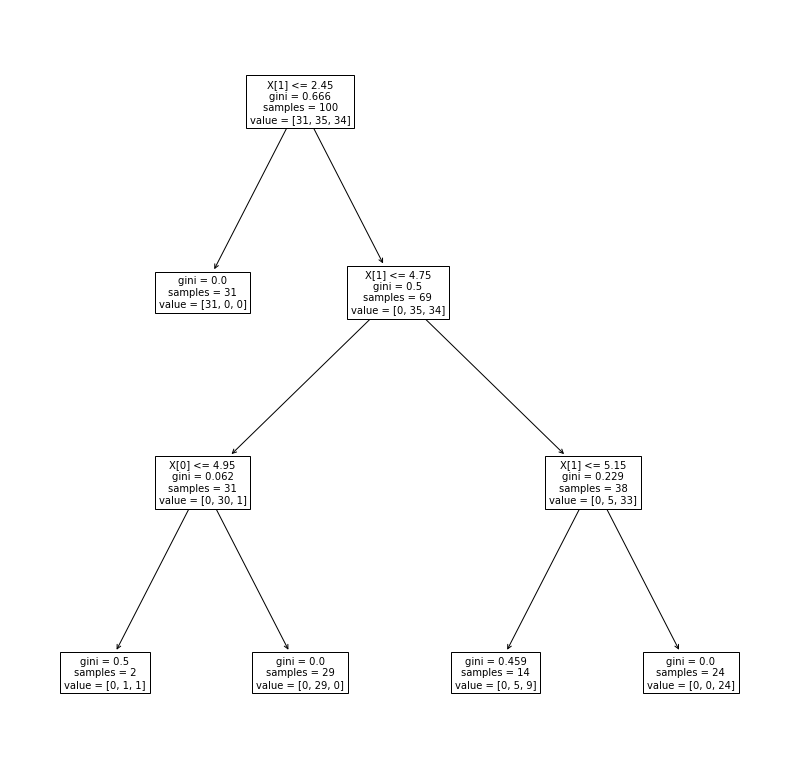

In [3]:
plt.figure(figsize=(14,14))  
tree.plot_tree(clf, fontsize=10)
plt.show()

# segunda questão 

In [17]:
# primeira tentativa será feita com random forest e depois irei utilizar o xgboost como comparativo
from xgboost import XGBClassifier
clf = XGBClassifier()
df = pd.read_excel("C:/Users/9900Ks/Downloads/rehabcardio.xls")
df = df[["HDL","LDL","Triglic","Glicose","Peso","Diabete"]].dropna(axis=0,how='any')
df["Triglic"] = df["Triglic"].astype(float)
X =  df[["HDL","LDL","Triglic","Glicose","Peso"]]
y = df[["Diabete"]]

In [18]:
df.dtypes

HDL        float64
LDL        float64
Triglic    float64
Glicose    float64
Peso       float64
Diabete    float64
dtype: object

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.25, random_state=41)

In [22]:
clf.fit(X_train,y_train)

[19:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
clf.score(X_test,y_test)

0.7846153846153846

In [24]:
y_pred = clf.predict(X_test)
classification_report(y_test,y_pred,output_dict=True)

{'0.0': {'precision': 0.8723404255319149,
  'recall': 0.8367346938775511,
  'f1-score': 0.8541666666666667,
  'support': 49},
 '1.0': {'precision': 0.5555555555555556,
  'recall': 0.625,
  'f1-score': 0.5882352941176471,
  'support': 16},
 'accuracy': 0.7846153846153846,
 'macro avg': {'precision': 0.7139479905437353,
  'recall': 0.7308673469387755,
  'f1-score': 0.7212009803921569,
  'support': 65},
 'weighted avg': {'precision': 0.794362611383888,
  'recall': 0.7846153846153846,
  'f1-score': 0.7887066365007542,
  'support': 65}}

In [25]:
# repetindo para o random forest

In [26]:
clf = RandomForestClassifier()

In [27]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
classification_report(y_test,y_pred,output_dict=True)

{'0.0': {'precision': 0.8958333333333334,
  'recall': 0.8775510204081632,
  'f1-score': 0.8865979381443299,
  'support': 49},
 '1.0': {'precision': 0.6470588235294118,
  'recall': 0.6875,
  'f1-score': 0.6666666666666667,
  'support': 16},
 'accuracy': 0.8307692307692308,
 'macro avg': {'precision': 0.7714460784313726,
  'recall': 0.7825255102040816,
  'f1-score': 0.7766323024054983,
  'support': 65},
 'weighted avg': {'precision': 0.8345965309200604,
  'recall': 0.8307692307692308,
  'f1-score': 0.8324610097805974,
  'support': 65}}

In [12]:
""" a precisão dos dois ficou muito parecida,  0.8775510 para o random forest e 0.8723404 para o Xgboost"""

' a precisão dos dois ficou muito parecida,  0.8775510 para o random forest e 0.8723404 para o Xgboost'

# Questão 3 

In [80]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
df = pd.read_excel('base.xlsx')
df.drop(columns="Unnamed: 0",inplace=True)

In [81]:
df

,Altura,Peso
0,180,75
1,170,70
2,165,65
3,175,72
4,190,78
5,185,78
6,160,62
7,170,65
8,175,68
9,180,78


Text(0.5, 1.0, 'Distancia Euclidiana')

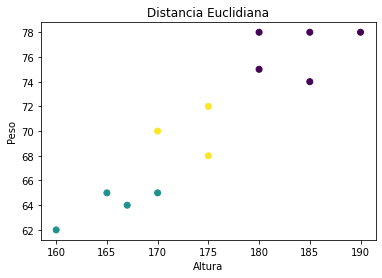

In [87]:


cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean')
y_pred = cluster.fit_predict(df)

plt.scatter(df["Altura"], df["Peso"], c=y_pred)
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title("Distancia Euclidiana")

Text(0.5, 1.0, 'Distancia Euclidiana')

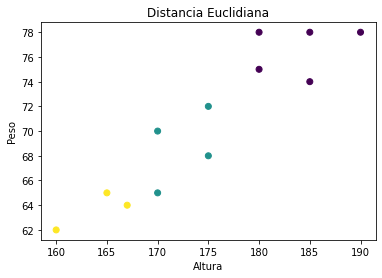

In [91]:
#kmeans = KMeans(n_clusters=3, random_state=0,).fit(df)
#kmeans.labels_
#y_pred = kmeans.predict(df)

cluster = AgglomerativeClustering(n_clusters=3,affinity="manhattan",linkage='complete')
y_pred = cluster.fit_predict(df)

plt.scatter(df["Altura"], df["Peso"], c=y_pred)
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title("Distancia Manhattan")

Text(0.5, 1.0, 'K-Means')

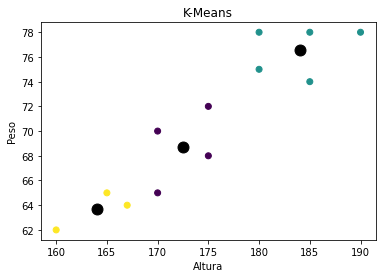

In [94]:
kmeans = KMeans(n_clusters=3, random_state=0,).fit(df)
kmeans.labels_
y_pred = kmeans.predict(df)
plt.scatter(df["Altura"], df["Peso"], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black',s=120)
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.title("K-Means")

In [ ]:
#o centroide de cada grupo está em preto